In [4]:
import numpy as np
from skimage.io import imread
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from keras.callbacks import History

In [5]:
# read all the images first
x_train = []
for i in range(1, 5):
    base_dir = rf"C:\Users\maxim\OneDrive\Desktop\cancer_data\stage_{i}_png/"
    files = os.listdir(base_dir)
    for file in tqdm(files):
        img = imread(base_dir+file)
        x_train.append(img)
x_train = np.array(x_train)
x_train.shape

100%|███████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 476.17it/s]


(1000, 512, 512)

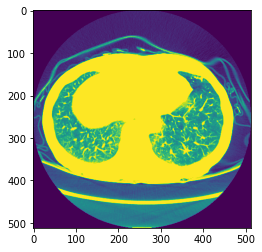

In [6]:
plt.imshow(x_train[0])

In [7]:
NUM = 250
CLASSES = 4
y_train = []
class_label = 0
for i in range(NUM*CLASSES):
    if i > 0 and i %  NUM == 0:
        class_label += 1
    y_train.append(class_label)
y_train = np.array(y_train)

In [8]:
# shuffle training data
shuffler = np.random.permutation(NUM*CLASSES)
x_train = x_train[shuffler]
y_train = y_train[shuffler]

In [9]:
# make training and testing data
NUM_TRAIN =int(NUM*CLASSES*0.85)
x_test = x_train[NUM_TRAIN:]
y_test = y_train[NUM_TRAIN:]
x_train = x_train[:NUM_TRAIN]
y_train = y_train[:NUM_TRAIN]

In [10]:
x_train[0].shape

(512, 512)

In [11]:
# flatten 
x_train_flattened = x_train.reshape(len(x_train), x_train[0].shape[0] * x_train[0].shape[1])
x_test_flattened = x_test.reshape(len(x_test), x_test[0].shape[0] * x_test[0].shape[1])

In [12]:
history = History()
model = keras.Sequential([
    keras.layers.Dense(2000, input_shape=(512*512,), activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(4, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=10, callbacks=[history])

ResourceExhaustedError: OOM when allocating tensor with shape[262144,2000] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:AddV2]

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(512, 512, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
x_wanted = x_train.reshape(len(x_train), 512, 512, 1)
cnn.fit(x_wanted, y_train, epochs=10)

Epoch 1/10
27/27 [==============================] - 103s 4s/step - loss: 2640.8267 - accuracy: 0.6659
Epoch 2/10
18/27 [===================>..........] - ETA: 33s - loss: 0.0212 - accuracy: 0.9965

KeyboardInterrupt: 

In [8]:
cnn = models.Sequential([
    layers.Conv2D(filters=40, kernel_size=(3, 3), activation='relu', input_shape=(512, 512, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=100, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [9]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
x_wanted = x_train.reshape(len(x_train), 512, 512, 1)
cnn.fit(x_wanted, y_train, epochs=10)

Epoch 1/10
27/27 [==============================] - 139s 5s/step - loss: 3647.3545 - accuracy: 0.6635
Epoch 2/10
27/27 [==============================] - 149s 6s/step - loss: 0.3417 - accuracy: 0.9918
Epoch 3/10
 1/27 [>.............................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

KeyboardInterrupt: 